# Script to Process Upper Columbia Habitat Quality Data Based on Criteria
## Author: Ryan Niemeyer, Upper Columbia Salmon Recovery Board
### For more information, see https://www.ucsrb.org/prioritization/


In [2]:
from IPython.display import Image
from IPython.core.display import HTML 
Image(url= "https://storage.googleapis.com/ff-storage-p01/festivals/logos/000/051/750/large/logo.jpg?1575572027", width=200, height=200)

## ------------------------------------ Upload Python Libraries -----------------------------------

In [54]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt 
# CHEAT SHEET for pd and np commands: https://www.dataquest.io/blog/pandas-cheat-sheet/#:~:text=%20Pandas%20Cheat%20Sheet%20%E2%80%94%20Python%20for%20Data,CSV%2C%20.xlsx%2C%20SQL%2C%20or%20JSON.%20%20More%20

## ------------------ Choose the Criteria for Habitat Quality Output Table and Output ------------------- 
### !!!!! DOUBLE CHECK these are the criteria you want !!!!!!!!!!!!!!

## Criteria for Query
### Update if criteria for output habitat quality tables change

In [62]:
# -------- Assessment Unit (AU) (HUC12) Tier rank (data in habitat_attribute_scores) ----------------
AU_Rank = [1]                        # 1 is high priority, 3 is low priority
# --------------- Reach Confinment (data in reach_life_stages) --------------------------------
Reach_Confinement = [5]              # 0 is confined, 5 is unconfined, based on USGS Valley Confinment Algorithm
# --------------- Sum Life Stage (data in reach_life_stages) ---------------------
Sum_Life_Stage = [6,7]   # 
# ----------------- Habitat Quality Score (data in habitat_attribute_scores) -----------------
Habitat_Quality_score = [4,5]      # 1 to 5, with 5 being 

## Tables and Column Names of Indicators/Variables
### Update if excel input names change OR column names change

In [172]:
# ------ AU_rank_vars = habitat_attribute_scores = 'AU Tier Spring CHN' and 'AU Tier Steelhead'
AU_Rank_vars = { 
 'data_frame': ['habitat_quality_scores', 'habitat_quality_scores'  ], 
 'variable': ['AU Rank Sp CHN' , 'AU Rank STL'] 
} 
# create a dataframe 
AU_Rank_vars = pd.DataFrame(AU_Rank_vars, columns = ['data_frame', 'variable']) 


# ------ Reach_Confinement: confinement_scores = 'Score' -------
Reach_Confinement_vars = { 
 'data_frame': ['confinement_scores' ], 
 'variable': ['Score'] 
} 
# create a dataframe 
Reach_Confinement_vars = pd.DataFrame(Reach_Confinement_vars, columns = ['data_frame', 'variable']) 


# ------ Sum_Life_Stage:   reach_life_stages = 'Sum_LifeStage'
Sum_Life_Stage_vars = { 
 'data_frame': ['reach_life_stages' ], 
 'variable': ['Sum_LifeStage'] 
} 
# create a dataframe 
Sum_Life_Stage_vars = pd.DataFrame(Sum_Life_Stage_vars, columns = ['data_frame', 'variable']) 


# ------ Habitat_Quality_score: habitat_attribute_scores = 'DRAFT Habitat Attribute Score (Currently MAX Score OR "0" if NA)'
Habitat_Quality_score_vars = { 
 'data_frame': ['habitat_quality_scores' ], 
 'variable': ['HQ_Score'] 
} 
# create a dataframe 
Habitat_Quality_score_vars = pd.DataFrame(Habitat_Quality_score_vars, columns = ['data_frame', 'variable']) 


## Output directory
### Update if you want output path to change

In [188]:
output_name_Spring_Chinook = 'Habitat_Quality_Output_Spring_Chinook.xlsx'
output_name_Steelhead = 'Habitat_Quality_Output_Steelhead.xlsx'
output_location = 'Y:/UCRTT/Prioritization/Step 2/Habitat Evaluation/'
output_location_Spring_Chinook =  output_location + output_name_Spring_Chinook
output_location_Steelhead =  output_location + output_name_Steelhead
print('output for Spring Chinook habitat quality table: ')
print(output_location_Spring_Chinook)
print("   ")
print('output for Steelhead habitat quality table: ' )
print(output_location_Steelhead)

output for Spring Chinook habitat quality table: 
Y:/UCRTT/Prioritization/Step 2/Habitat Evaluation/Habitat_Quality_Output_Spring_Chinook.xlsx
   
output for Steelhead habitat quality table: 
Y:/UCRTT/Prioritization/Step 2/Habitat Evaluation/Habitat_Quality_Output_Steelhead.xlsx


## ---------------------------- Upload the Habitat Data Excel ---------------------------- 

### Open Habitat Analaysis Tabs: Habitat Attribute Score, Confinement Scores

In [162]:
habitat_quality_scores = pd.read_excel('Y:/UCRTT/Prioritization/Step 2/Habitat Evaluation/MASTER_Step2_HabitatAnalysis.xlsx', 
                   'HabitatQuality_Scores')
confinement_scores = pd.read_excel('Y:/UCRTT/Prioritization/Step 2/Habitat Evaluation/MASTER_Step2_HabitatAnalysis.xlsx', 
                   'Confinement_Scores')

### Open Tables from Habitat Database: Reach Life Stage, 

In [13]:
reach_life_stages = pd.read_excel('Y:/UCRTT/Prioritization/Step 2/Habitat Evaluation/MASTER_Step2_SECOND_HabitatAnalysis.xlsx', 
                   'Reach_Life_Stage_Spring_Chino')

## ---------------------------- Use the Criteria to query a subset the habitat data ----------------------------

In [118]:
# -------- Assessment Unit (AU) (HUC12) Tier rank (data in habitat_attribute_scores) ----------------
AU_Rank = [1]                        # 1 is high priority, 3 is low priority
# --------------- Reach Confinment (data in reach_life_stages) --------------------------------
Reach_Confinement = [5]              # 0 is confined, 5 is unconfined, based on USGS Valley Confinment Algorithm
# --------------- Sum Life Stage (data in reach_life_stages) ---------------------
Sum_Life_Stage = [6,7]   # 
# ----------------- Habitat Quality Score (data in habitat_attribute_scores) -----------------
Habitat_Quality_score = [4,5]      # 1 to 5, with 5 being 

## ---------------------------- Use Criteria to Generate Table for Spring Chinook ----------------------------

### Filter out to only have Spring Chinook reaches

In [197]:
spring_chinook_reaches_true = ['yes']
Spring_Chinook_data_frame = habitat_quality_scores.loc[habitat_quality_scores['Spring.Chinook.Reach'].isin(spring_chinook_reaches_true)] 
print('initial number of reaches: ' + str(habitat_quality_scores.shape[0]) )
print('number of reaches after including only Spring Chinook reaches: ' + str(Spring_Chinook_data_frame.shape[0]) )

initial number of reaches: 734
number of reaches after including only Spring Chinook reaches: 388


### Filter out by AU Rank - NOTE - change "variable" based on species

In [198]:
# NOTE: need to change variable to 0 or 1 (AU_Rank_vars['variable'][1]) based on species 
Spring_Chinook_data_frame = Spring_Chinook_data_frame.loc[Spring_Chinook_data_frame[AU_Rank_vars['variable'][0]].isin(AU_Rank)] 
print('number of reaches after AU criteria: ' + str(Spring_Chinook_data_frame.shape[0]) )

number of reaches after AU criteria: 123


### Filter out by Habitat Quality Score

In [199]:
Spring_Chinook_data_frame = Spring_Chinook_data_frame.loc[Spring_Chinook_data_frame[Habitat_Quality_score_vars['variable'][0]].isin(Habitat_Quality_score)] 
print('number of reaches/row after Habitat Quality Score criteria:' + str(Spring_Chinook_data_frame.shape[0]) )

number of reaches/row after Habitat Quality Score criteria:79


### Filter out by Reach Confinement

In [200]:
Confinement_Criteria = confinement_scores.loc[confinement_scores[Reach_Confinement_vars['variable'][0]].isin(Reach_Confinement)]
Confinement_Criteria_Reaches = Confinement_Criteria.ReachName
Spring_Chinook_data_frame = Spring_Chinook_data_frame.loc[Spring_Chinook_data_frame['ReachName'].isin(Confinement_Criteria_Reaches)] 
print('number of reaches/row after Reach Confinement criteria: ' + str(Spring_Chinook_data_frame.shape[0]) )

number of reaches/row after Reach Confinement criteria: 66


### Filter out by Sum Life Stage

In [201]:
Sum_Life_Stage_Criteria = reach_life_stages.loc[reach_life_stages[Sum_Life_Stage_vars['variable'][0]].isin(Sum_Life_Stage)]
Sum_Life_Stage_Criteria_Reaches = Sum_Life_Stage_Criteria.ReachName
Spring_Chinook_data_frame = Spring_Chinook_data_frame.loc[Spring_Chinook_data_frame['ReachName'].isin(Sum_Life_Stage_Criteria_Reaches)] 
print('number of reaches/row after Sum Life Stage criteria: ' + str(Spring_Chinook_data_frame.shape[0]) )

number of reaches/row after Sum Life Stage criteria: 64


## -------------------------------- Use Criteria to Generate Table for Steelhead --------------------------------

### Filter out to only have Steelhead reaches

In [204]:
steelhead_reaches_true = ['yes']
Steelhead_data_frame = habitat_quality_scores.loc[habitat_quality_scores['Steelhead.Reach'].isin(steelhead_reaches_true)] 
print('initial number of reaches: ' + str(habitat_quality_scores.shape[0]) )
print('number of reaches after including only Steelhead reaches: ' + str(Steelhead_data_frame.shape[0]) )

initial number of reaches: 734
number of reaches after including only Steelhead reaches: 609


### Filter out by AU Rank - NOTE - change "variable" based on species

In [205]:
# NOTE: need to change variable to 0 or 1 (AU_Rank_vars['variable'][1]) based on species 
Steelhead_data_frame = Steelhead_data_frame.loc[Steelhead_data_frame[AU_Rank_vars['variable'][1]].isin(AU_Rank)] 
print('number of reaches after AU criteria: ' + str(Steelhead_data_frame.shape[0]) )

number of reaches after AU criteria: 219


### Filter out by Habitat Quality Score

In [206]:
Steelhead_data_frame = Steelhead_data_frame.loc[Steelhead_data_frame[Habitat_Quality_score_vars['variable'][0]].isin(Habitat_Quality_score)] 
print('number of reaches after Habitat Quality Score criteria: ' + str(Steelhead_data_frame.shape[0]) )

number of reaches after Habitat Quality Score criteria: 98


### Filter out by Reach Confinement

In [207]:
Confinement_Criteria = confinement_scores.loc[confinement_scores[Reach_Confinement_vars['variable'][0]].isin(Reach_Confinement)]
Confinement_Criteria_Reaches = Confinement_Criteria.ReachName
Steelhead_data_frame = Steelhead_data_frame.loc[Steelhead_data_frame['ReachName'].isin(Confinement_Criteria_Reaches)] 
print('number of reaches after Reach Confinement criteria: ' + str(Steelhead_data_frame.shape[0]) )

number of reaches after Reach Confinement criteria: 76


### Filter out by Sum Life Stage

In [208]:
Sum_Life_Stage_Criteria = reach_life_stages.loc[reach_life_stages[Sum_Life_Stage_vars['variable'][0]].isin(Sum_Life_Stage)]
Sum_Life_Stage_Criteria_Reaches = Sum_Life_Stage_Criteria.ReachName
Steelhead_data_frame = Steelhead_data_frame.loc[Steelhead_data_frame['ReachName'].isin(Sum_Life_Stage_Criteria_Reaches)] 
print('number of reaches after Sum Life Stage criteria: ' + str(Steelhead_data_frame.shape[0]) )

number of reaches after Sum Life Stage criteria: 76


##  -------------------------------- Save/Output the data to specified directory -------------------------------

In [209]:
Spring_Chinook_data_frame.to_excel(output_location_Spring_Chinook, index = False)

In [210]:
Steelhead_data_frame.to_excel(output_location_Steelhead, index = False)

## -------------- End of code - this is EXTRA - just playing with the data ------

(array([279., 111., 349.,   0.,   0.]),
 array([ 0,  2,  4,  6,  8, 10]),
 <a list of 5 Patch objects>)

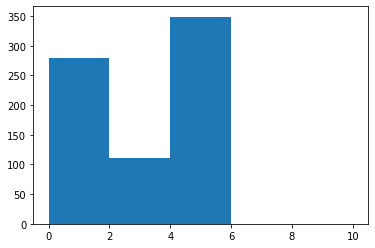

In [69]:
plt.hist(confinement_scores['Score'],bins = [0,2,4,6,8,10]) 

In [70]:
list(reach_life_stages.columns)

['ReachName',
 'Basin',
 'AssessmentUnit',
 'SpringChinookReach',
 'SPCH_Adult_Migration',
 'SPCH_Holding',
 'SPCH_Spawning',
 'SPCH_Fry_Colonization',
 'SPCH_Summer_Rearing',
 'SPCH_Winter_Rearing',
 'SPCH_Smolt_Emigration',
 'Sum_LifeStage']

TypeError: 'value' must be an instance of str or bytes, not a int

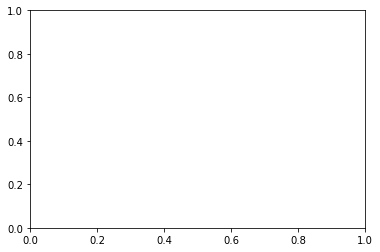

In [168]:
plt.hist(habitat_quality_scores['AU Rank Sp CHN'][9:22],bins = [0,1,2,3,4])

In [171]:
habitat_quality_scores['AU Rank Sp CHN'][35:70]

35                 2
36                 1
37                 1
38                 1
39                 1
40                 3
41                 1
42                 3
43                 3
44                 3
45                 3
46                 3
47                 3
48                 3
49                 2
50                 1
51    Not a Priority
52                 2
53                 2
54                 2
55                 2
56                 2
57                 2
58                 2
59               NaN
60                 1
61                 3
62                 3
63                 3
64                 3
65                 3
66                 1
67                 1
68                 1
69                 1
Name: AU Rank Sp CHN, dtype: object

In [167]:
list(habitat_quality_scores.columns)

['ReachName',
 'Assessment Unit',
 'Subbasin',
 'Spring.Chinook.Reach',
 'Steelhead.Reach',
 'AU Rank Sp CHN',
 'AU Rank STL',
 'Temperature',
 'Flow- Summer Base Flow',
 'Riparian- Structure',
 'Riparian-Disturbance',
 'Riparian- Canopy Cover',
 'Total Riparian',
 'Substrate',
 'Cover- Wood',
 'Pools- All Pools',
 'Off-Channel- Floodplain',
 'Off-Channel- Side-Channels',
 'Off-Channel Total',
 'Channel Stability',
 'Bank Stability',
 'Stability Total',
 'HQ_Sum',
 'HQ_Pct',
 'HQ_Score',
 'Reviewer Comments (please note your suggested change [0, 3, or 5] and document your rationale for changing the value.']